In [58]:
import pandas as pd
import csv

def overlap(cut_and_tag, output_csv):
    '''
    Given CUT&Tag CSV file containing Homer annotation analysis, 
    compare to RNA-seq data and return overlapping genes, 
    as well as the log2FC values for each gene.
    '''

    # Read in CSV file
    cut_and_tag_df =  pd.read_csv(cut_and_tag)
    print('Read in CUT&Tag data from:', cut_and_tag)

    # Read in the RNA-seq data
    rna_seq_df = pd.read_csv('RNA_seq_siBAZ2B_results.csv')
    print('Read in RNA-seq data from: RNA_seq_siBAZ2B_results.csv')

    genes = []
    log2FC = []
    annotations = []

    # Search for overlapping genes
    for name in cut_and_tag_df['Gene Name']:
        for gene in rna_seq_df['SYMBOL']:
            if name == gene:
                genes.append(name)
                log2FC.append(rna_seq_df.loc[rna_seq_df['SYMBOL'] == gene, 'log2FoldChange'].values[0])
                annotations.append(cut_and_tag_df.loc[cut_and_tag_df['Gene Name'] == name, 'Annotation'].values[0])
    
    # Create a new DataFrame
    df = pd.DataFrame({'Gene Name': genes, 'log2FoldChange': log2FC, 'Annotation': annotations})
    df['Annotation'] = df['Annotation'].apply(lambda x: 'Intron' if x.startswith('intron') else x)
    df['Annotation'] = df['Annotation'].apply(lambda x: 'Promoter' if x.startswith('promoter') else x)
    df_filtered = df[df['Annotation'].str.contains(r'^(Promoter|Intron|Intergenic)')]
    
    # Write to a new CSV file
    df_filtered.to_csv(output_csv, index=False)

overlap('annotations_siBAZ2B_raw_MACS2_common_2.csv', 'siBAZ2B_common_rna_seq_overlap.csv')
overlap('annotations_siBAZ2B_raw_MACS2_unique_Ctrl.csv', 'siBAZ2B_unique_rna_seq_overlap.csv')



Read in CUT&Tag data from: annotations_siBAZ2B_raw_MACS2_common_2.csv
Read in RNA-seq data from: RNA_seq_siBAZ2B_results.csv


/var/folders/_q/whhxl_rd61gcb6kdz_mv3bzc0000gn/T/ipykernel_3332/3680593826.py:35: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_filtered = df[df['Annotation'].str.contains(r'^(Promoter|Intron|Intergenic)')]


Read in CUT&Tag data from: annotations_siBAZ2B_raw_MACS2_unique_Ctrl.csv
Read in RNA-seq data from: RNA_seq_siBAZ2B_results.csv


/var/folders/_q/whhxl_rd61gcb6kdz_mv3bzc0000gn/T/ipykernel_3332/3680593826.py:35: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_filtered = df[df['Annotation'].str.contains(r'^(Promoter|Intron|Intergenic)')]


/var/folders/_q/whhxl_rd61gcb6kdz_mv3bzc0000gn/T/ipykernel_79022/2921803042.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=promoter_df,  x='Label', y='log2FoldChange', ax=axs[0], log_scale=True, inner='quartile', palette=palette)
/var/folders/_q/whhxl_rd61gcb6kdz_mv3bzc0000gn/T/ipykernel_79022/2921803042.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=intergenic_df,  x='Label', y='log2FoldChange', ax=axs[1], log_scale=True, inner='quartile',  palette=palette)
/var/folders/_q/whhxl_rd61gcb6kdz_mv3bzc0000gn/T/ipykernel_79022/2921803042.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` vari

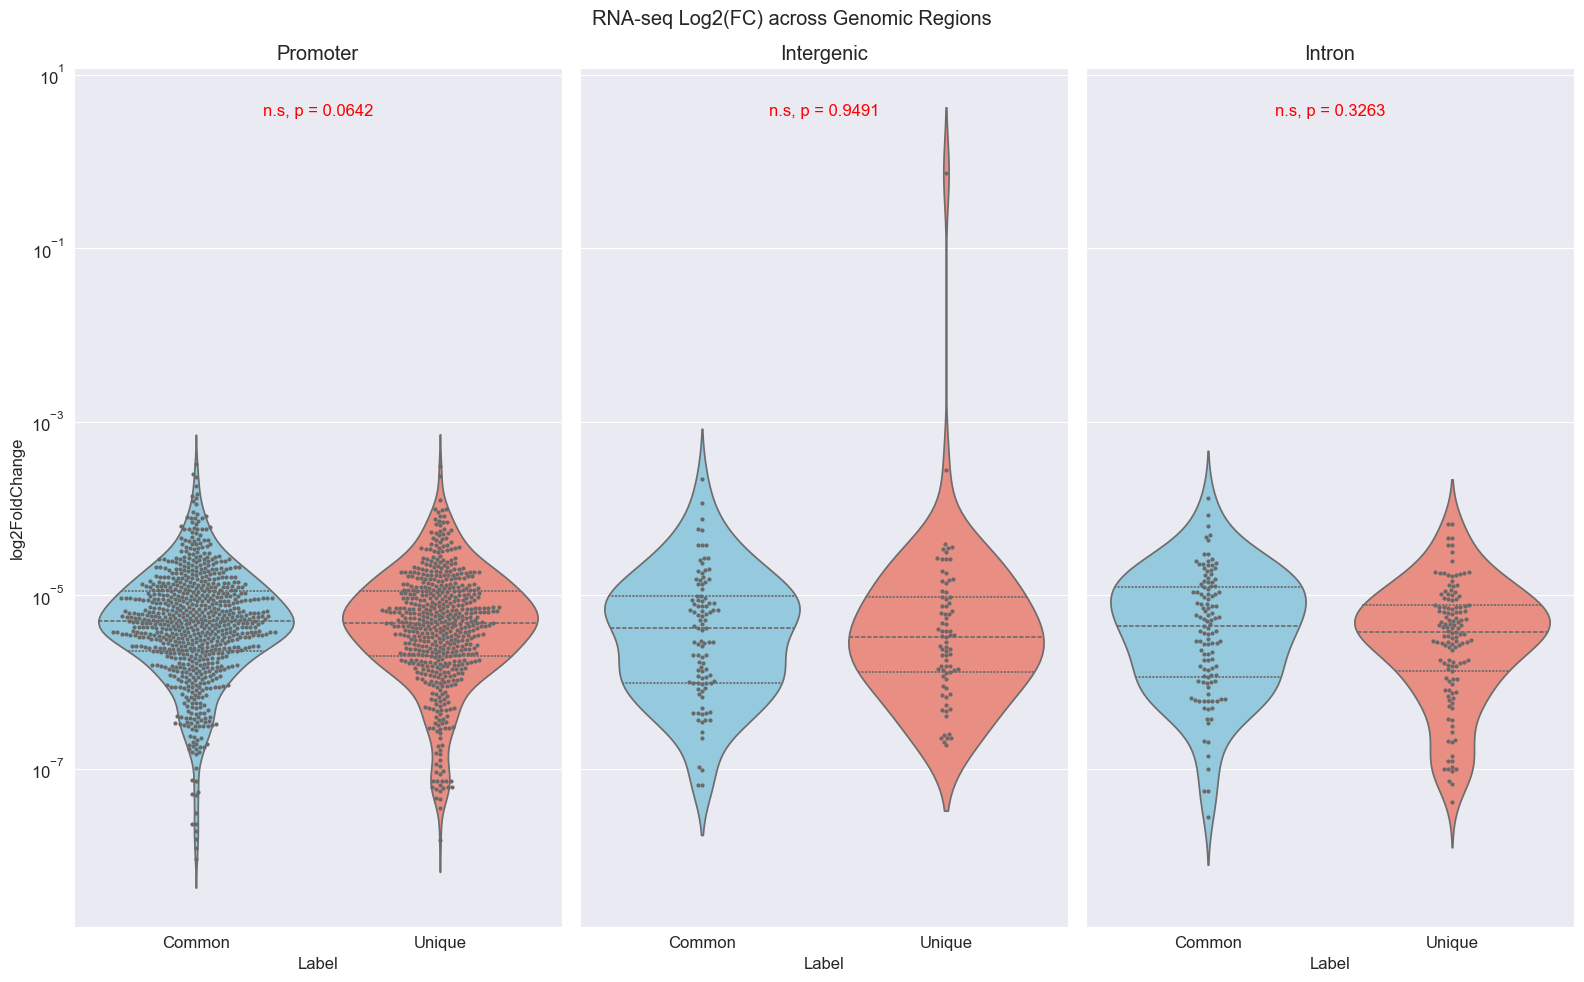

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
from scipy.stats import mannwhitneyu

def plot(common, unique):
    # Read CSV files
    common_df = pd.read_csv(common)
    unique_df = pd.read_csv(unique)

    # Label the data
    common_df['Label'] = 'Common'
    unique_df['Label'] = 'Unique'

    # Filter data based on Annotation
    common_promoter_df = common_df[common_df['Annotation'] == 'Promoter']
    common_intron_df = common_df[common_df['Annotation'] == 'Intron']
    common_intergenic_df = common_df[common_df['Annotation'] == 'Intergenic']

    unique_promoter_df = unique_df[unique_df['Annotation'] == 'Promoter']
    unique_intron_df = unique_df[unique_df['Annotation'] == 'Intron']
    unique_intergenic_df = unique_df[unique_df['Annotation'] == 'Intergenic']

    # Merge common and unique data
    promoter_df = pd.concat([common_promoter_df, unique_promoter_df], ignore_index=True)
    intron_df = pd.concat([common_intron_df, unique_intron_df], ignore_index=True)
    intergenic_df = pd.concat([common_intergenic_df, unique_intergenic_df], ignore_index=True)

    # Initialize the figure
    fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(16, 10))
    sns.set_style('darkgrid')
    palette = {'Common': 'skyblue', 'Unique': 'salmon'}

    # Create violin plots
    sns.violinplot(data=promoter_df,  x='Label', y='log2FoldChange', ax=axs[0], log_scale=True, inner='quartile', palette=palette)
    sns.swarmplot(data=promoter_df,  x='Label', y='log2FoldChange', ax=axs[0], log_scale=True, size=3, color='dimgrey')
    sns.violinplot(data=intergenic_df,  x='Label', y='log2FoldChange', ax=axs[1], log_scale=True, inner='quartile',  palette=palette)
    sns.swarmplot(data=intergenic_df,  x='Label', y='log2FoldChange', ax=axs[1], log_scale=True, size=3, color='dimgrey')
    sns.violinplot(data=intron_df,  x='Label', y='log2FoldChange', ax=axs[2], log_scale=True, inner='quartile', palette=palette)
    sns.swarmplot(data=intron_df,  x='Label', y='log2FoldChange', ax=axs[2], log_scale=True, size=3, color='dimgrey')

    # Perform statistical tests and annotate plots
    def add_stat_annotation(ax, data):
        commons = data[data['Label'] == 'Common']['log2FoldChange']
        uniques = data[data['Label'] == 'Unique']['log2FoldChange']
        
        stat, p = mannwhitneyu(commons, uniques)
        if p < 0.05:
            star = f'*, p = {p:.4f}'
        elif p < 0.01:
            star = f'**, p = {p:.4f}'
        elif p < 0.001:
            star = f'***, p = {p:.4f}'
        elif p < 0.0001:
            star = f'****, p = {p:.4f}'
        else:
            star = f'n.s, p = {p:.4f}'
        
        ax.text(0.5, 0.95, star, ha='center', va='center', transform=ax.transAxes, fontsize=12, color='red')

    # Set titles and labels
    axs[0].set_title('Promoter')
    axs[1].set_title('Intergenic')
    axs[2].set_title('Intron')
    plt.rcParams["font.family"] = "sans-serif"
    plt.rcParams["font.sans-serif"] = ["Arial"]
    plt.rcParams.update({'font.size': 12})
    plt.axhline(0, color='gray', linewidth=0.5, linestyle='--')

    add_stat_annotation(axs[0], promoter_df)
    add_stat_annotation(axs[1], intergenic_df)
    add_stat_annotation(axs[2], intron_df)

    fig.suptitle('RNA-seq Log2(FC) across Genomic Regions')
    plt.tight_layout()
    plt.show()

plot('siBAZ2B_common_rna_seq_overlap.csv', 'siBAZ2B_unique_rna_seq_overlap.csv')